# Machine Learning Algorithms
For this section, you are only allowed to use pandas, numpy, scikit-learn and if necessary seaborn

The iris dataset will be used for this exercise, please load from scikit-learn and consolidate as a DataFrame, generate a species column with names of categories (setosa, versicolor, virginica).

Please use a logistic regression model. Also, this is a model in train and test sample, so please use this random seed: 42



##  1. Using feature selection, choose only 2 variables to generate a multiclass classification model (species column as target).Please write variable's name correctly

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
iris = datasets.load_iris() #Loading the dataset
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

In [4]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

In [5]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

# Droping the target and species since we only need the measurements
X = iris.drop(['target','species'], axis=1)

# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (2,3)]# Se escogieron las variables petal length(cm) y petal width(cm)

y = iris['target']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

In [9]:
print(iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target    species  
0 

In [10]:
print(X)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [13]:
training_prediction = log_reg.predict(X_train)
training_prediction

array([1., 2., 1., 0., 1., 2., 0., 0., 1., 2., 0., 2., 0., 0., 2., 1., 2.,
       2., 2., 2., 1., 0., 0., 1., 2., 0., 0., 0., 1., 2., 0., 2., 2., 0.,
       1., 1., 2., 1., 2., 0., 2., 1., 2., 1., 1., 1., 0., 1., 1., 0., 1.,
       2., 2., 0., 1., 2., 2., 0., 2., 0., 1., 2., 2., 1., 2., 1., 1., 2.,
       2., 0., 1., 1., 0., 1., 2.])

In [15]:
test_prediction = log_reg.predict(X_test)
test_prediction

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 2., 2., 1., 2., 1.,
       2., 1., 0., 2., 1., 0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 1., 2.,
       0., 1., 2., 0., 2., 2., 1.])

## 2. Show a confusion matrix through a heatmap from your selected model in your test sample.

In [16]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, test_prediction)
cf_matrix

array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  0, 23]], dtype=int64)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

Text(0.5, 15.0, 'Predicted label')

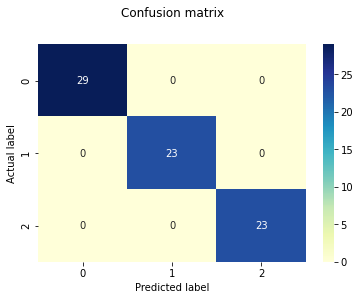

In [18]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 3.. Calculate this metrics, also give some explanations about it:

##           I. Gini coefficient either train and test sample.

##           II. Recall index

##           III. Precision index

In [20]:
from sklearn import metrics

In [21]:
auc_test=metrics.accuracy_score(y_test, test_prediction)

In [22]:
gini_test=2*auc_test-1

In [23]:
print(gini_test)

1.0


In [25]:
auc_train=metrics.accuracy_score(y_train, training_prediction)

In [28]:
gini_train=2*auc_train-1

In [29]:
print(gini_train)

0.8666666666666667


In [30]:
print("Precision, Recall, Confusion matrix, in testing\n")

# Precision Recall scores
print(metrics.classification_report(y_test, test_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_test, test_prediction))

Precision, Recall, Confusion matrix, in testing

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      1.000     1.000     1.000        23
         2.0      1.000     1.000     1.000        23

    accuracy                          1.000        75
   macro avg      1.000     1.000     1.000        75
weighted avg      1.000     1.000     1.000        75

[[29  0  0]
 [ 0 23  0]
 [ 0  0 23]]
